In [141]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics 

In [142]:
data=pd.read_csv("D:\Codes\Python\Diabetes\Dataset of Diabetes .csv")
datacpy=data.copy()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Muthu\AppData\Local\Temp\ipykernel_7272\2970873125.py:1: SyntaxWarning: invalid escape sequence '\C'
  data=pd.read_csv("D:\Codes\Python\Diabetes\Dataset of Diabetes .csv")


Cr: Creatinine
A waste product measured in blood and urine to assess kidney function.

HbA1c: Hemoglobin A1c
A measure of the average blood sugar levels over the past 2-3 months, used in diabetes management.

Chol: Cholesterol
A type of lipid found in the blood; high levels can increase the risk of heart disease.

TG: Triglycerides
A type of fat (lipid) in the blood; high levels can be a risk factor for cardiovascular diseases.

HDL: High-Density Lipoprotein
Often referred to as "good cholesterol" because it helps remove other forms of cholesterol from the bloodstream.

LDL: Low-Density Lipoprotein
Known as "bad cholesterol" because high levels can lead to the buildup of cholesterol in arteries.

VLDL: Very Low-Density Lipoprotein
A type of lipoprotein that carries triglycerides in the blood; like LDL, it is considered harmful in excess.

In [143]:
data

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [144]:
data.drop('ID',axis=1,inplace=True) 
data.drop('No_Pation',axis=1,inplace=True)   

In [145]:
data["Gender"].unique()

array(['F', 'M', 'f'], dtype=object)

In [146]:
data["CLASS"]=data["CLASS"].replace(to_replace={'N ':'N','Y':'P','Y ':'P'})

In [147]:
data["CLASS"].unique()

array(['N', 'P'], dtype=object)

In [148]:
data["CLASS"]=data["CLASS"].map({'N':0,'P':1})

In [149]:
data["Gender"]=data["Gender"].replace(to_replace={'f':'F'})

In [150]:
data["Gender"]=data["Gender"].map({'F':0,'M':1})

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  1000 non-null   int64  
 1   AGE     1000 non-null   int64  
 2   Urea    1000 non-null   float64
 3   Cr      1000 non-null   int64  
 4   HbA1c   1000 non-null   float64
 5   Chol    1000 non-null   float64
 6   TG      1000 non-null   float64
 7   HDL     1000 non-null   float64
 8   LDL     1000 non-null   float64
 9   VLDL    1000 non-null   float64
 10  BMI     1000 non-null   float64
 11  CLASS   1000 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 93.9 KB


In [152]:
data.shape

(1000, 12)

In [153]:
data.drop_duplicates(inplace=True)

In [154]:
data.shape

(826, 12)

In [155]:
data

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
5,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
6,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
990,0,57,4.1,70,9.3,5.3,3.3,1.0,1.4,1.3,29.0,1
992,1,55,3.1,39,8.5,5.0,2.5,1.9,2.9,0.7,27.0,1
993,1,28,3.5,61,8.5,4.5,1.9,1.1,2.6,0.8,37.0,1
994,1,69,10.3,185,7.7,4.9,1.9,1.2,3.0,0.7,37.0,1


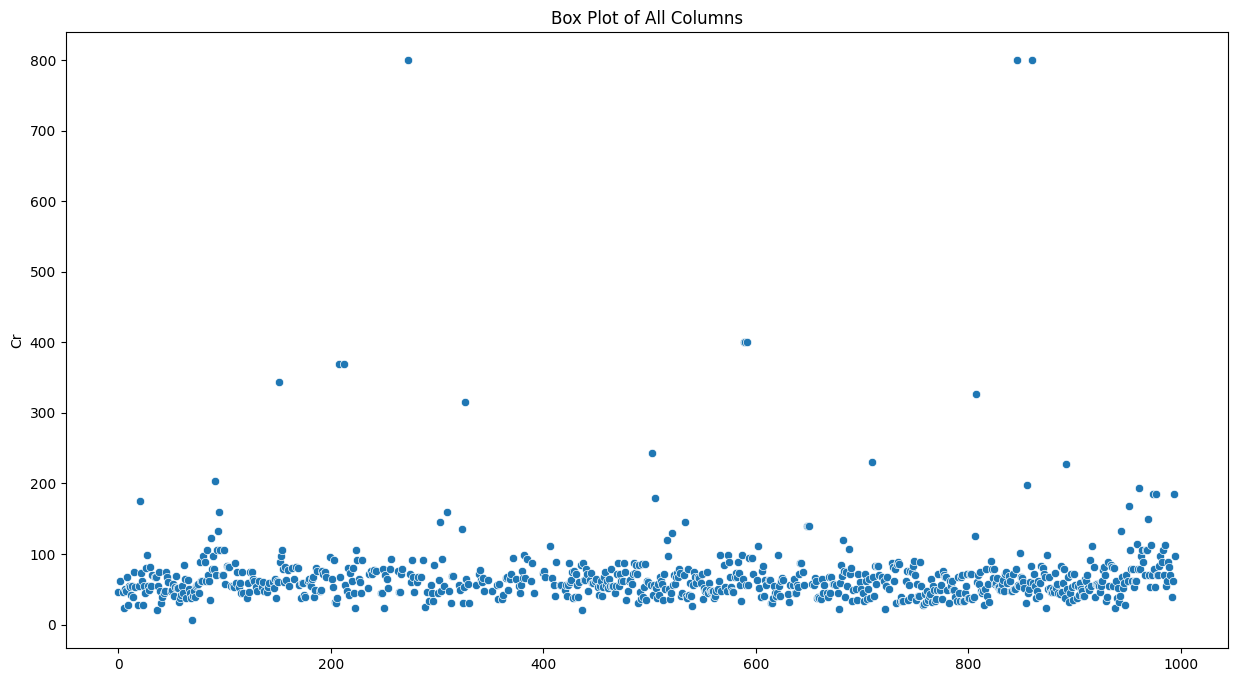

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.scatterplot(data=data["Cr"])
plt.title("Box Plot of All Columns")
plt.show()

In [157]:
data.shape

(826, 12)

In [158]:
from scipy.stats import zscore

def handle_outliers_zscore(df, columns, threshold=3):
    df_cleaned = df.copy()
    for column in columns:
        z_scores = zscore(df_cleaned[column])  
        median = df_cleaned[column].median()
        df_cleaned[column] = np.where(
                np.abs(z_scores) > threshold, median, df_cleaned[column]
            )
    return df_cleaned

numerical_columns = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
data = handle_outliers_zscore(data, numerical_columns)
print("Original Data Shape:", data.shape)
print("After Replacing Outliers Shape:", data.shape)


Original Data Shape: (826, 12)
After Replacing Outliers Shape: (826, 12)


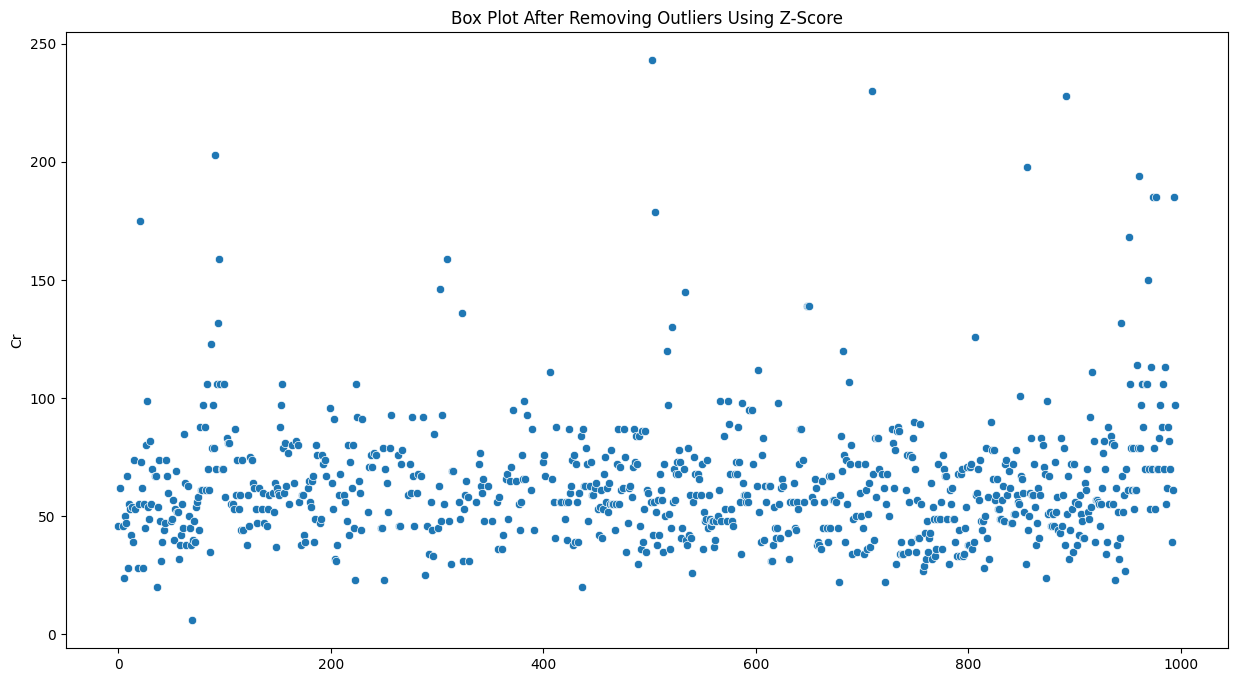

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.scatterplot(data=data["Cr"])
plt.title("Box Plot After Removing Outliers Using Z-Score")
plt.show()

In [160]:
data.head(3)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,55.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
4,1,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [161]:
data["CLASS"].value_counts()

CLASS
1    730
0     96
Name: count, dtype: int64

In [162]:
smote = SMOTE(random_state=42)
x=data.drop("CLASS",axis=1)
y=data["CLASS"]
x,y= smote.fit_resample(x,y)

In [163]:
data

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,55.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
4,1,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
5,0,45.0,2.3,24.0,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
6,0,50.0,2.0,50.0,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
990,0,57.0,4.1,70.0,9.3,5.3,3.3,1.0,1.4,1.3,29.0,1
992,1,55.0,3.1,39.0,8.5,5.0,2.5,1.9,2.9,0.7,27.0,1
993,1,28.0,3.5,61.0,8.5,4.5,1.9,1.1,2.6,0.8,37.0,1
994,1,69.0,10.3,185.0,7.7,4.9,1.9,1.2,3.0,0.7,37.0,1


In [164]:
data=pd.DataFrame(x,columns=datacpy.columns[2:-1])

In [165]:
data["CLASS"]=y

In [166]:
data.shape

(1460, 12)

In [167]:
data.drop_duplicates(inplace=True)
data.shape

(1455, 12)

In [168]:
data["CLASS"].value_counts()

CLASS
1    730
0    725
Name: count, dtype: int64

In [169]:
sx=preprocessing.StandardScaler()
sx.fit(data.drop("CLASS",axis=1))
feat=sx.transform(data.drop("CLASS",axis=1))
y=data["CLASS"]

In [170]:
data=pd.DataFrame(feat,columns=data.columns[:-1])

In [171]:
data.head(3)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,-0.769353,0.033817,0.021974,-0.626445,-0.6605,-0.364530,-0.999508,3.333603,-1.237930,-0.552534,-0.446631
1,1.299794,0.560388,-0.090360,-0.029345,-0.6605,-0.842398,-0.528120,-0.193168,-0.478275,-0.452410,-0.639281
2,1.299794,-1.756522,1.369984,-0.626445,-0.6605,0.304487,-0.905231,-1.007038,-0.586797,-0.652658,-1.024581


In [172]:
cm=data.corr()
cm

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
Gender,1.000000,0.253728,0.180406,0.217374,0.305974,0.077099,0.195486,-0.132835,0.006785,0.191297,0.339450
AGE,0.253728,1.000000,0.247577,0.143380,0.497978,0.136968,0.257046,-0.013325,-0.031904,0.069482,0.520904
Urea,0.180406,0.247577,1.000000,0.588413,0.081562,0.089295,0.167146,-0.017982,-0.001950,0.040032,0.123027
Cr,0.217374,0.143380,0.588413,1.000000,-0.036856,-0.008616,0.109738,0.011314,0.026421,0.083119,-0.001008
HbA1c,0.305974,0.497978,0.081562,-0.036856,1.000000,0.318168,0.328324,-0.050455,-0.019556,0.209612,0.696685
Chol,0.077099,0.136968,0.089295,-0.008616,0.318168,1.000000,0.363153,0.043013,0.418757,0.168399,0.215839
TG,0.195486,0.257046,0.167146,0.109738,0.328324,0.363153,1.000000,-0.124871,0.090266,0.190826,0.299178
HDL,-0.132835,-0.013325,-0.017982,0.011314,-0.050455,0.043013,-0.124871,1.000000,-0.186003,-0.035376,-0.010760
LDL,0.006785,-0.031904,-0.001950,0.026421,-0.019556,0.418757,0.090266,-0.186003,1.000000,0.068359,-0.061034
VLDL,0.191297,0.069482,0.040032,0.083119,0.209612,0.168399,0.190826,-0.035376,0.068359,1.000000,0.230597


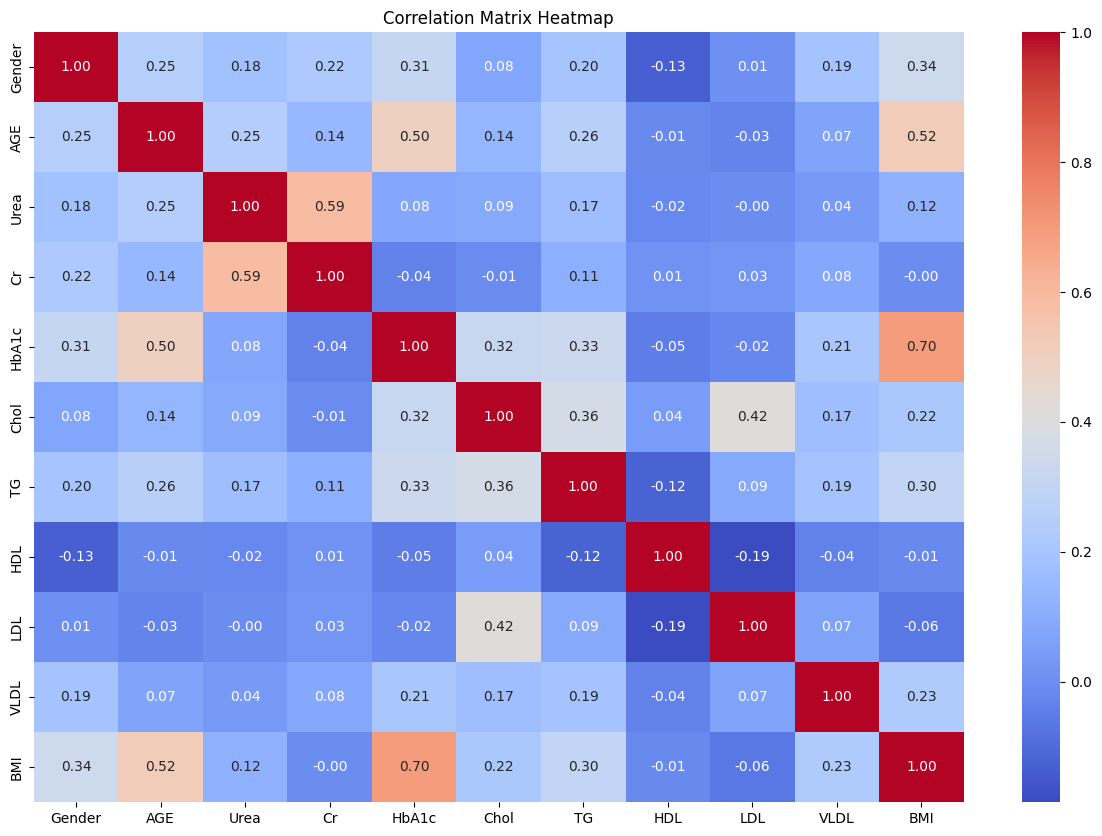

In [173]:
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [174]:
x=data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [175]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [176]:
a=model.predict(x_test)
print(metrics.accuracy_score(y_test,a))
print(metrics.confusion_matrix(y_test,a))
print(metrics.recall_score(y_test,a))
print(metrics.precision_score(y_test,a))
print(metrics.f1_score(y_test,a))
print(metrics.classification_report(y_test,a))

0.989010989010989
[[186   0]
 [  4 174]]
0.9775280898876404
1.0
0.9886363636363636
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       186
           1       1.00      0.98      0.99       178

    accuracy                           0.99       364
   macro avg       0.99      0.99      0.99       364
weighted avg       0.99      0.99      0.99       364



In [177]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [10, 20,25, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


rf = RandomForestClassifier(random_state=42)


random_search1 = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')

random_search1.fit(x_train, y_train)

print("Best Parameters:", random_search1.best_params_)
print("Best Score:", random_search1.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 25}
Best Score: 0.9917473084495831


In [178]:
a=random_search1.best_estimator_.predict(x_test)
print(metrics.accuracy_score(y_test,a))
print(metrics.confusion_matrix(y_test,a))
print(metrics.recall_score(y_test,a))
print(metrics.precision_score(y_test,a))
print(metrics.f1_score(y_test,a))
print(metrics.classification_report(y_test,a))

0.989010989010989
[[186   0]
 [  4 174]]
0.9775280898876404
1.0
0.9886363636363636
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       186
           1       1.00      0.98      0.99       178

    accuracy                           0.99       364
   macro avg       0.99      0.99      0.99       364
weighted avg       0.99      0.99      0.99       364



In [179]:
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [180]:
a=model2.predict(x_test)
print(metrics.accuracy_score(y_test,a))
print(metrics.confusion_matrix(y_test,a))
print(metrics.recall_score(y_test,a))
print(metrics.precision_score(y_test,a))
print(metrics.f1_score(y_test,a))
print(metrics.classification_report(y_test,a))

0.9917582417582418
[[184   2]
 [  1 177]]
0.9943820224719101
0.9888268156424581
0.9915966386554622
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       186
           1       0.99      0.99      0.99       178

    accuracy                           0.99       364
   macro avg       0.99      0.99      0.99       364
weighted avg       0.99      0.99      0.99       364



In [181]:
param_dist = {
    'max_depth': [5,10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'criterion': ['gini', 'entropy']
}


dt = DecisionTreeClassifier(random_state=42)


random_search2 = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')


random_search2.fit(x_train, y_train)


print("Best Parameters:", random_search2.best_params_)
print("Best Score:", random_search2.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 6, 'max_depth': 10, 'criterion': 'gini'}
Best Score: 0.9935821708349042


In [182]:
a=random_search2.best_estimator_.predict(x_test)
print(metrics.accuracy_score(y_test,a))
print(metrics.confusion_matrix(y_test,a))
print(metrics.recall_score(y_test,a))
print(metrics.precision_score(y_test,a))
print(metrics.f1_score(y_test,a))
print(metrics.classification_report(y_test,a))

0.9917582417582418
[[185   1]
 [  2 176]]
0.9887640449438202
0.9943502824858758
0.9915492957746479
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       186
           1       0.99      0.99      0.99       178

    accuracy                           0.99       364
   macro avg       0.99      0.99      0.99       364
weighted avg       0.99      0.99      0.99       364



In [183]:
model3=SVC()
model3.fit(x_train,y_train)

SVC()

In [184]:
a=model3.predict(x_test)
print(metrics.accuracy_score(y_test,a))
print(metrics.confusion_matrix(y_test,a))
print(metrics.recall_score(y_test,a))
print(metrics.precision_score(y_test,a))
print(metrics.f1_score(y_test,a))
print(metrics.classification_report(y_test,a))

0.9807692307692307
[[186   0]
 [  7 171]]
0.9606741573033708
1.0
0.9799426934097422
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       186
           1       1.00      0.96      0.98       178

    accuracy                           0.98       364
   macro avg       0.98      0.98      0.98       364
weighted avg       0.98      0.98      0.98       364



In [185]:
from sklearn.model_selection import GridSearchCV
param_dist = {
    'C': [0.1, 1, 10, 100,110,115],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [1,2, 3, 4, 5]
}

# Initialize the SVC model
svc = SVC(random_state=42)

# Initialize Randomized Search with cross-validation
grid_search1 = GridSearchCV(estimator=svc, param_grid=param_dist, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit Randomized Search to the data
grid_search1.fit(x_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search1.best_params_)
print("Best Score:", grid_search1.best_score_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters: {'C': 100, 'degree': 1, 'kernel': 'rbf'}
Best Score: 0.9734112521469566


In [186]:
a=grid_search1.best_estimator_.predict(x_test)
print(metrics.accuracy_score(y_test,a))
print(metrics.confusion_matrix(y_test,a))
print(metrics.recall_score(y_test,a))
print(metrics.precision_score(y_test,a))
print(metrics.f1_score(y_test,a))
print(metrics.classification_report(y_test,a))

0.9835164835164835
[[184   2]
 [  4 174]]
0.9775280898876404
0.9886363636363636
0.9830508474576272
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       186
           1       0.99      0.98      0.98       178

    accuracy                           0.98       364
   macro avg       0.98      0.98      0.98       364
weighted avg       0.98      0.98      0.98       364



In [187]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(random_state=42)
model4=lgbm.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 552, number of negative: 539
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 1091, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505958 -> initscore=0.023832
[LightGBM] [Info] Start training from score 0.023832
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [188]:
a=model4.predict(x_test)
print(metrics.accuracy_score(y_test,a))
print(metrics.confusion_matrix(y_test,a))
print(metrics.recall_score(y_test,a))
print(metrics.precision_score(y_test,a))
print(metrics.f1_score(y_test,a))
print(metrics.classification_report(y_test,a))

0.9945054945054945
[[186   0]
 [  2 176]]
0.9887640449438202
1.0
0.9943502824858758
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       186
           1       1.00      0.99      0.99       178

    accuracy                           0.99       364
   macro avg       0.99      0.99      0.99       364
weighted avg       0.99      0.99      0.99       364



In [189]:
param_dist = {
    'num_leaves': [10, 20, 30, 40, 50],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'min_child_samples': [  5, 10, 15, 20, 25],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

# Initialize the LightGBM model
lgbm = lgb.LGBMClassifier(random_state=42)

# Initialize Randomized Search with cross-validation
random_search4 = RandomizedSearchCV(estimator=lgbm, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')

# Fit Randomized Search to the data
random_search4.fit(x_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", random_search4.best_params_)
print("Best Score:", random_search4.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Number of positive: 552, number of negative: 539
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 1091, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505958 -> initscore=0.023832
[LightGBM] [Info] Start training from score 0.023832
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [190]:
a=random_search4.predict(x_test)
print(metrics.accuracy_score(y_test,a))
print(metrics.confusion_matrix(y_test,a))
print(metrics.recall_score(y_test,a))
print(metrics.precision_score(y_test,a))
print(metrics.f1_score(y_test,a))
print(metrics.classification_report(y_test,a))

0.9945054945054945
[[186   0]
 [  2 176]]
0.9887640449438202
1.0
0.9943502824858758
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       186
           1       1.00      0.99      0.99       178

    accuracy                           0.99       364
   macro avg       0.99      0.99      0.99       364
weighted avg       0.99      0.99      0.99       364



In [191]:
from sklearn.ensemble import AdaBoostClassifier
base_estimator = DecisionTreeClassifier(random_state=42)
model5 = AdaBoostClassifier(estimator=base_estimator, random_state=42)
model5.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42),
                   random_state=42)

In [192]:
a=model5.predict(x_test)
print(metrics.accuracy_score(y_test,a))
print(metrics.confusion_matrix(y_test,a))
print(metrics.recall_score(y_test,a))
print(metrics.precision_score(y_test,a))
print(metrics.f1_score(y_test,a))
print(metrics.classification_report(y_test,a))

0.9917582417582418
[[184   2]
 [  1 177]]
0.9943820224719101
0.9888268156424581
0.9915966386554622
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       186
           1       0.99      0.99      0.99       178

    accuracy                           0.99       364
   macro avg       0.99      0.99      0.99       364
weighted avg       0.99      0.99      0.99       364



In [193]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model6=xgb_clf.fit(x_train,y_train)

c:\Users\Muthu\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:56:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [194]:
a=model6.predict(x_test)
print(metrics.accuracy_score(y_test,a))
print(metrics.confusion_matrix(y_test,a))
print(metrics.recall_score(y_test,a))
print(metrics.precision_score(y_test,a))
print(metrics.f1_score(y_test,a))
print(metrics.classification_report(y_test,a))

0.9972527472527473
[[186   0]
 [  1 177]]
0.9943820224719101
1.0
0.9971830985915493
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       186
           1       1.00      0.99      1.00       178

    accuracy                           1.00       364
   macro avg       1.00      1.00      1.00       364
weighted avg       1.00      1.00      1.00       364



In [195]:
import lime
import lime.lime_tabular


explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=x_train.values,
    feature_names=x.columns,
    class_names=['Not Diabetic', 'Diabetic'],
    mode='classification'
)


instance_index = 0
instance = x_test.iloc[instance_index].values


explanation = explainer.explain_instance(
    data_row=instance,
    predict_fn=model.predict_proba
)

explanation.show_in_notebook(show_table=True, show_all=False)

c:\Users\Muthu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
